# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [95]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')
%matplotlib inline

# 1. Is the distribution of body temperatures normal?

The central limit theorem (CLT) establishes that, when independent random variables are added, their properly normalized sum tends toward a normal distribution.
In practice, some statisticians say that a sample size of 30 is large enough when the population distribution is roughly bell-shaped. Others recommend a sample size of at least 40.

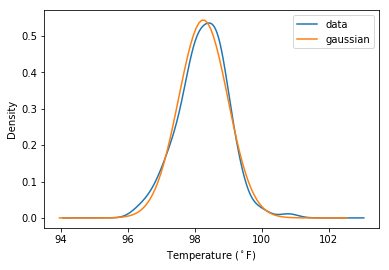

In [68]:
ax=df.temperature.plot.density()
ax.set_xlabel(r"Temperature ($^\circ$F)")
mu = df.temperature.mean()
sigma = df.temperature.std()
x = np.linspace(mu-8*variance,mu+8*variance, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
ax.legend(('data',"gaussian"))

In the plot above, I compared the data with one gaussian and it is possible to see that there is a very small difference between both curves.

In [102]:
dist= stats.norm(df.temperature.mean(), df.temperature.std())
stats.ks_2samp(df.temperature, dist.rvs(130))

Ks_2sampResult(statistic=0.099999999999999978, pvalue=0.51262304089134769)

A p value of 51.2% leads me to think that we can model the distribution of body temperatures using a normal distribution.

# 2. Is the sample size large? Are the observations independent?

In practice, some statisticians say that a sample size of 30 is large enough when the population distribution is roughly normal shaped. 

It is defined that two observations are independent if "the occurrence of one event doesn't change the probability for the other". For the data set that we are using the temperature of one of the individuals in the survey will not affect the temperature of another one, so the two observations are independent.

# 3. Is the true population mean really 98.6 degrees F?

* Would you use a one-sample or two-sample test? Why?

We want to compare the mean value of the body temperature of our survey with the reference value reported by Carl Wunderlich in a famous 1868 book. This test corresponds to a one-sample test.

* In this situation, is it appropriate to use the  t  or  z  statistic?

We have more that 30 samples, considering that a sample size of 30 is large enough when the population distribution is roughly normal shaped, we should use the z statistic.

Let's start assuming that the mean body temperature is $98.6^{\circ}F$,

Form our survey, the mean body temperature value $\mu_x$ and the standard error $\sigma_x=\frac{\sigma}{\sqrt{n}}$ are

In [87]:
mu

98.24923076923078

In [94]:
sigmax=sigma/np.sqrt(len(df))
sigmax

0.06430441683789101

Using the $z$ statistic

$z=\frac{|\mu-\mu_{H_0}|}{\sigma_x}=\frac{|98.25-98.6|}{0.064}$

In [90]:
np.abs(98.25-98.6)/0.064

5.4687499999999112

This means that $98.6^{\circ}F$ is far from the mean value of our survey by $5.49\sigma_x$. The Z critic value for two tails distribution of 1% is equal to 2.57, the value that I obtained is much larger, so it is very unlikely that the average body temperature would be equal to $98.6^{\circ}F$

* Now try using the other test. How is the result be different? Why?

First of all we have more than 30 samples to apply a $t$ statistic, but even with that, let's consier that we have 100 degrees of freedom.

The t critic value for two tails destribution of 1% is equal to 2.626. This means that using a t statistic it is also unlikely to get a mean body temperature of $98.6^{\circ}F$.

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

* Start by computing the margin of error and confidence interval.

With the mean value, the standard error and known that the $z$ critical value to obtain 95% of confidence is 1.96, it is possile to calculate the confidence interval.

In [103]:
CI_min=mu-1.96*sigmax
CI_max=mu+1.96*sigmax

so that, the interval is:

In [105]:
print "(",CI_min,",",CI_max,")"

( 98.1231941122 , 98.3752674262 )


Termperatures below 99.1 and over 98.4 are not normal.

# 5. Is there a significant difference between males and females in normal temperature?

* What test did you use and why?

To analyze the diference between men and women, we have to do a two samples analysis.

In [118]:
males = df[df.gender=="M"]
females = df[df.gender=="F"]

In [126]:
mu_males= males.temperature.mean()
mu_females=females.temperature.mean()

In [127]:
mu_males

98.1046153846154

In [128]:
mu_females

98.39384615384613

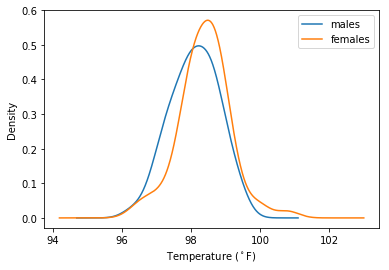

In [117]:
ax=males.temperature.plot.density()
females.temperature.plot.density()
ax.set_xlabel(r"Temperature ($^\circ$F)")
ax.legend(('males',"females"))

to check if the temperature is different, let's do a hypothesis testing

## Null hypothesis

$H_0$:$\mu_m-\mu_f=0$

## Alternative hypothesis

$H_1$:$\mu_m-\mu_f\neq 0$

Let's assume that the null hypothesis is true. We can calculate the two samples variance

In [130]:
mu_mf = mu_males-mu_females
mu_mf

-0.289230769230727

In [134]:
sigma_mf = np.sqrt(males.temperature.std()**2/len(males) + females.temperature.std()**2/len(females))
sigma_mf

0.12655395041982642

Now let's proceed to the $z$ test

$z=\frac{|\mu_{m-f}-0|}{\sigma_{m-f}}$

In [137]:
z=np.abs(mu_mf-0)/sigma_mf
z

2.2854345381652741

Using a significance of 1% for our test, the critical value is 2.57. As our z value is smalles we can say that there is no a significant difference between the two mean values.

* Write a story with your conclusion in the context of the original problem.

In 1868 Carl Wunderlich reported a value for the mean normal human body temperatue equal to $98.6^{\circ}F$. Recent studies have done to check the veracity of this value. The temperature of 130 randomly assigned people were measured. With a confidence interval of $95\%$, the normal human body temperature is betwen $98.12^{\circ}F$ and $98.37^{\circ}F$, which lead us to reject the temperature reported by Carl Wunderlich. It was also found that with a significance value of $1\%$, there is no difference between men and women temperature.